### 1. Install Required Libraries:

In [ ]:
# !pip install pandas scikit-learn tensorflow

### 2. Import Libraries:

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### 3. Load and Prepare Dataset:

In [48]:
# Load dataset
df = pd.read_csv("C:/Users/sathi/Downloads/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 4. Drop non-informative column:

In [51]:
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

### 5. Encode target:

In [54]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

### 6. One-hot encode categorical columns:

In [57]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### 7.Data Visualization:

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

### 7.1 Box plot for 'MonthlyCharges' by 'Churn':

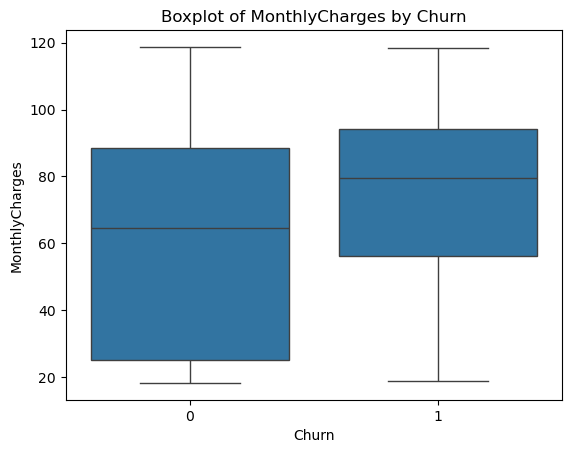

In [66]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Boxplot of MonthlyCharges by Churn")
plt.show()

### 7.2 Heatmap of correlations:

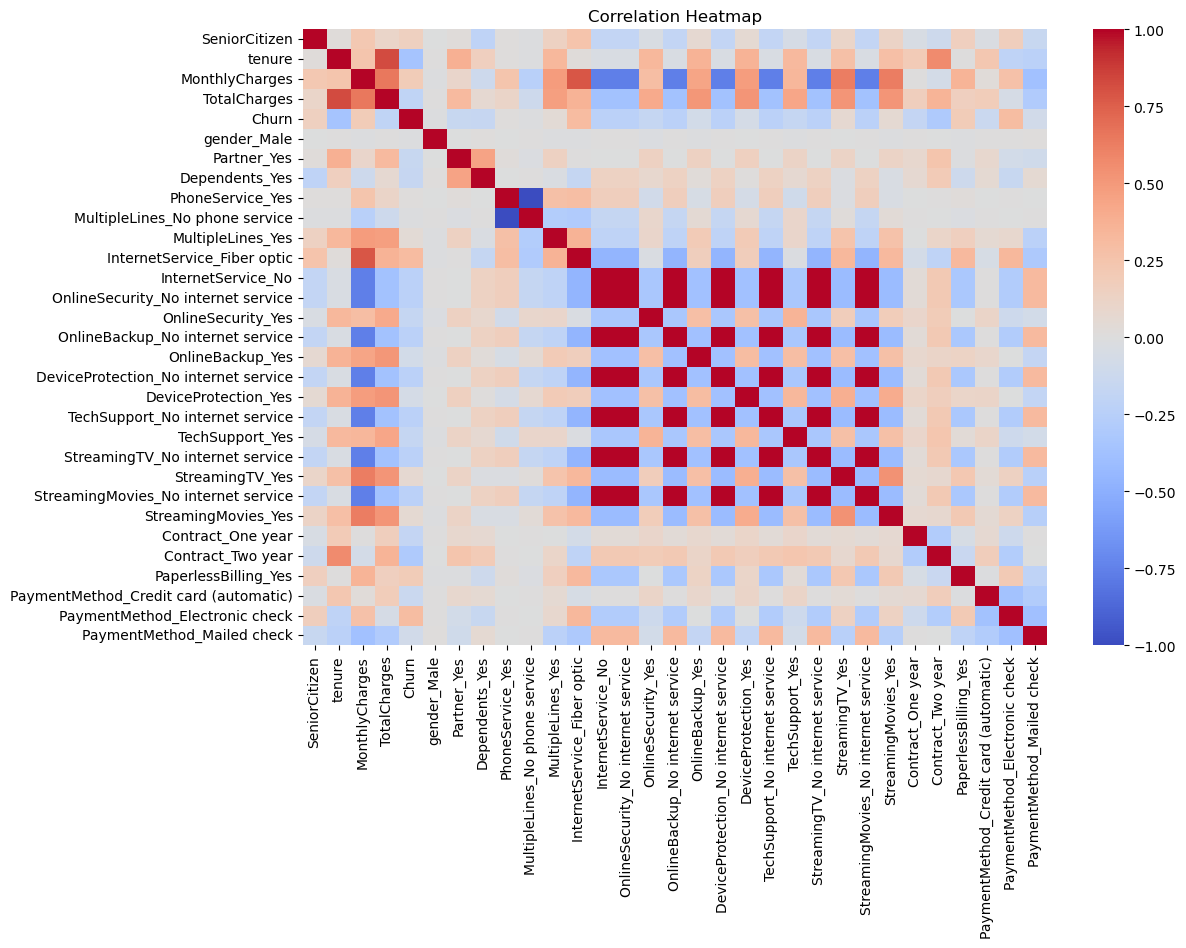

In [71]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

### 7.3 Countplot for Churn:

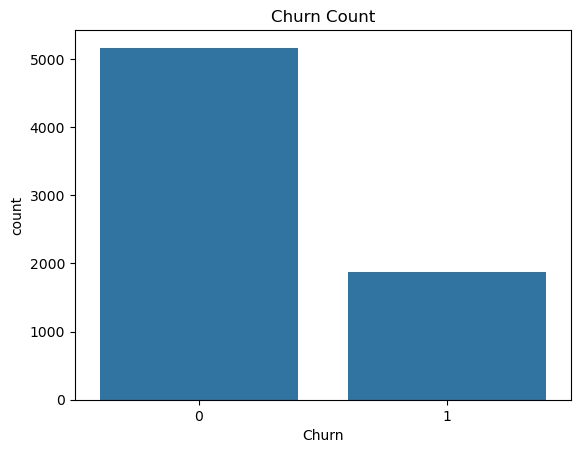

In [74]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()

### 7.4 KDE Plot of MonthlyCharges:

C:\Users\sathi\AppData\Local\Temp\ipykernel_7720\3584929422.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['MonthlyCharges'], shade=True)


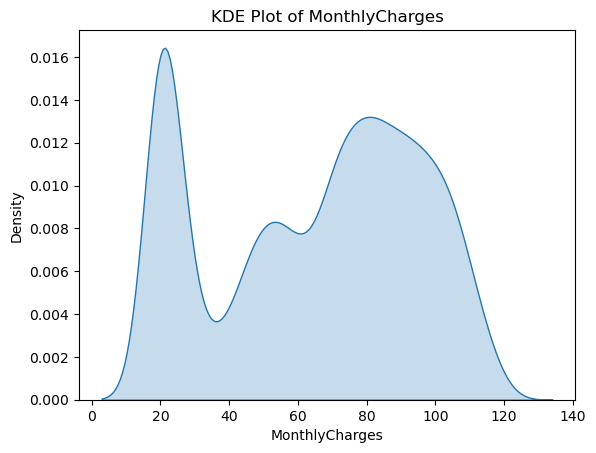

In [77]:
sns.kdeplot(df['MonthlyCharges'], shade=True)
plt.title("KDE Plot of MonthlyCharges")
plt.show()

### 8.Model Training:

In [82]:
# Feature/Target Split
X = df.drop('Churn', axis=1)
y = df['Churn']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

### 8.1 Model Training: 

In [85]:
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 8.2 Training:

In [102]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8415 - loss: 0.3613 - val_accuracy: 0.7851 - val_loss: 0.4216
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8347 - loss: 0.3648 - val_accuracy: 0.7922 - val_loss: 0.4229
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8470 - loss: 0.3555 - val_accuracy: 0.7904 - val_loss: 0.4169
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8443 - loss: 0.3595 - val_accuracy: 0.7940 - val_loss: 0.4270
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8436 - loss: 0.3644 - val_accuracy: 0.7904 - val_loss: 0.4212
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8445 - loss: 0.3608 - val_accuracy: 0.7940 - val_loss: 0.4251
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8416 - loss: 0.3676 - val_accuracy: 0.7922 - val_loss: 0.4262
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8443 - loss: 0.3565 - val_accu

### 8.3 Evaluation:

In [111]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test Accuracy: {accuracy:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.7811


### 9 .Save the Trained Model and Scaler:

In [ ]:
# Save Keras model
model.save("churn_model.h5")

# Save scaler using joblib
import joblib
joblib.dump(scaler, "ANN_scaler.pkl")